## Importing and setting up our data

We start by bringing in CSV data into Python program. 
We then parse the data using the CSV package.
Lastly we close the csv file after we have read the information.</br>
The data that I have chosen is ramen ratings. I plan to show the differences in ramen flavors from countries. As not all countries have the same flavors. 

In [1]:
import matplotlib.pyplot as plt
import csv
from collections import Counter
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict

In [2]:
with open('data/ramen-ratings.csv', 'r', encoding='utf-8') as datafile:
    ramen_data = csv.DictReader(datafile)
    data_list = []
    
    for row in ramen_data:
        data_list.append(row)

What we are doing here is looking at the first set of data in row 0. Making sure everything is being read

In [3]:
data_list[0]

{'Review': '2580',
 'Brand': 'New Touch',
 'Variety': "T's Restaurant Tantanmen ",
 'Style': 'Cup',
 'Country': 'Japan',
 'Stars': '3.75',
 'Top Ten': ''}

## Need to format the data
I chose to pick only cup noodles since it's very hard to mess those up. Then I will be putting the data into a newlist so that I can use that list to count the amount of times each country.
For the data below I have US and Mexico, and I have other countries that I will be choosing. And the flavors I chose were chicken, beef, and shrimp. </br>
The process I went about creating this is figure out how to get the loops to find flavors with the words chicken, beef, and shrimp. I had create a new list and ue a split to make sure it would read through the csv and put anything with those words into the list. Then I created 3 for loops, in those for loops I had to seperate the flavors in the countries that I picked as well as count how many of each type of flavors they had. So I had them read the newlist I created and they went through the loop being put into the countries specific flavor. So USA chicken and Mexico chicken is an example of what I did. And each time they found one of them they would be put into their list, and counted. I did this for all 3 flavors.

In [4]:
ramen_data = {}
flavors= ['Chicken', 'Beef', 'Shrimp', 'chicken', 'beef', 'shrimp', 'Pollo', 'Camaron', 'Carne','pollo', 'camaron', 'carne']
new_list = []
for item in data_list:
    if item['Country'] == 'USA' or item['Country'] == 'Mexico': 
        if item['Style'] == 'Cup':
            variety_strlist = item['Variety'].split(' ')
            for w in variety_strlist:
                if w in flavors:
                    new_list.append(item)
                    break


usChicken, mxChicken = 0, 0

for y in new_list:
    if 'chicken' in y['Variety'].lower() or 'pollo' in y['Variety'].lower():
        if 'USA' in y['Country']:
            usChicken += 1 
        else:
            mxChicken += 1
chicken = [usChicken, mxChicken]

usBeef, mxBeef = 0, 0
for y in new_list:
    if 'beef' in y['Variety'].lower() or 'carne' in y['Variety'].lower():
        if 'USA' in y['Country']:
            usBeef += 1 
        else:
            mxBeef += 1
beef = [usBeef, mxBeef]

usShrimp, mxShrimp = 0, 0
for y in new_list:
    if 'shrimp' in y['Variety'].lower() or 'Camaron' in y['Variety']:
        if 'USA' in y['Country']:
            usShrimp += 1 
        else:
            mxShrimp += 1
shrimp = [usShrimp, mxShrimp]


## US and South Korea
I did the same process as above but searched for flavors in South Korea.

In [5]:
ramen_data = {}
flavors= ['Chicken', 'Beef', 'Shrimp', 'chicken', 'beef', 'shrimp']
new_list2 = []

for item1 in data_list:
    if item1['Country'] == 'USA' or item1['Country'] == 'South Korea': 
        if item1['Style'] == 'Cup':
            variety_strlist = item1['Variety'].split(' ')
            for w in variety_strlist:
                if w in flavors:
                    new_list2.append(item1)
                    break


usChicken1, skChicken = 0, 0

for r in new_list2:
    if 'chicken' in r['Variety'].lower():
        if 'USA' in r['Country']:
            usChicken1 += 1 
        else:
            skChicken += 1
chicken1 = [usChicken1, skChicken]

usBeef1, skBeef = 0, 0
for r in new_list2:
    if 'beef' in r['Variety'].lower():
        if 'USA' in r['Country']:
            usBeef1 += 1 
        else:
            skBeef += 1
beef1 = [usBeef1, skBeef]

usShrimp1, skShrimp = 0, 0
for r in new_list2:
    if 'shrimp' in r['Variety'].lower():
        if 'USA' in r['Country']:
            usShrimp1 += 1 
        else:
            skShrimp += 1

shrimp1 = [usShrimp1, skShrimp]

## Japan and South Korea 
In this one I wanted to compare the amount of spicy flavor noodles each country had.

In [6]:
ramen_data = {}
flavors= ['Spicy']
new_list3 = []

for item1 in data_list:
    if item1['Country'] == 'Japan' or item1['Country'] == 'South Korea': 
        if item1['Style'] == 'Cup':
            variety_strlist = item1['Variety'].split(' ')
            for w in variety_strlist:
                if w in flavors:
                    new_list3.append(item1)
                    break

jpSpicy, skSpicy = 0, 0

for r in new_list3:
    if 'spicy' in r['Variety'].lower():
        if 'Japan' in r['Country']:
            jpSpicy += 1 
        else:
            skSpicy += 1
Spicy = [jpSpicy, skSpicy]

## Create the visual

I am going to create bar graphs for all the countries as I think it's easier to see and show the difference. 

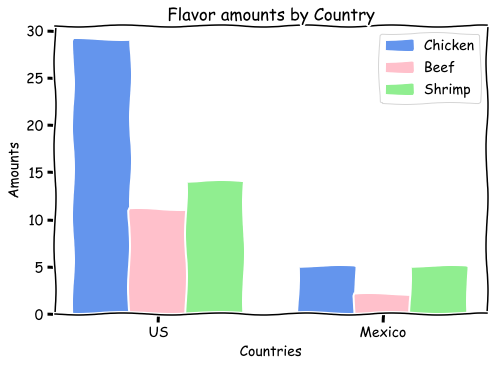

In [28]:
N = 2
ind = np.arange(N)
plt.xkcd()
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([2, 10, 1, 1])
countries = ['US', 'Mexico']

x = np.arange(len(countries))
width = 0.25
data=[chicken, beef, shrimp]
ax.bar(x-width, data[0],width, color = 'cornflowerblue', label='Chicken')
ax.bar(x, data[1],width,  color = 'pink', label='Beef')
ax.bar(x+ width, data[2],width, color = 'lightgreen', label='Shrimp')

ax.set_title('Flavor amounts by Country')
ax.set_ylabel('Amounts')
ax.set_xlabel('Countries')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()
plt.show()

What I found out here is that the US had lots of chicken flavors compared to Mexico. And within the flavors chosen in the US chicken had the most amounts compared to the other 2 flavors. Although Mexico doesn't have much of any of them. I had been specific on the flavors I picked, unless I picked some that were more common in Mexico we might've seen more. Or if I had picked packets instead of cups. 

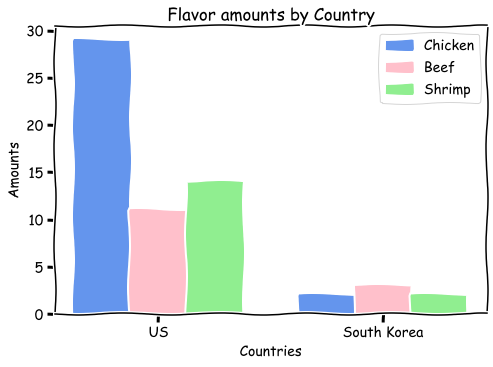

In [20]:
N = 2
ind = np.arange(N)
plt.xkcd()
X = np.arange(2)
fig = plt.figure()
#ax = fig.add_axes([0, 0, 1, 1] )
ax = fig.add_axes([2, 10, 1, 1])
countries1 = ['US', 'South Korea']

x = np.arange(len(countries1))
width = 0.25
data=[chicken1, beef1, shrimp1]
ax.bar(x-width, data[0],width, color = 'cornflowerblue', label='Chicken')
ax.bar(x, data[1],width,  color = 'pink', label='Beef')
ax.bar(x+ width, data[2],width, color = 'lightgreen', label='Shrimp')


ax.set_title('Flavor amounts by Country')
ax.set_ylabel('Amounts')
ax.set_xlabel('Countries')
ax.set_xticks(x)
ax.set_xticklabels(countries1)
ax.legend()
plt.show()

Here we see there's an even smaller amount for these flavors in South Korea than in Mexico. Which shows that the US has more flavors in chicken, beef, and shrimp than the other 2 countries. 

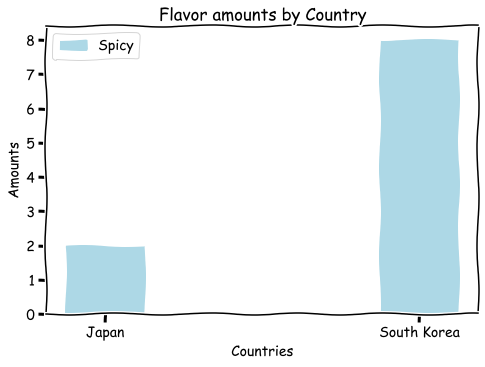

In [24]:
N = 2
ind = np.arange(N)
plt.xkcd()
X = np.arange(2)
fig = plt.figure()
#ax = fig.add_axes([0, 0, 1, 1] )
ax = fig.add_axes([2, 10, 1, 1])
countries2 = ['Japan', 'South Korea']

x = np.arange(len(countries2))
width = 0.25
data=[Spicy]
ax.bar(x, data[0],width, color = 'lightblue', label='Spicy')

ax.set_title('Flavor amounts by Country')
ax.set_ylabel('Amounts')
ax.set_xlabel('Countries')
ax.set_xticks(x)
ax.set_xticklabels(countries2)
ax.legend()
plt.show()

I'm not too surprised to see South Korea has more spicy flavor cup ramens than Japan as more food in South Korea is Spicy. While foods in Japan aren't spicy, but just more flavorful. 